In [383]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import xlrd
import seaborn as sns

In [279]:
df = pd.read_excel('stockprices.xlsx', sheet_name='Sheet2')

In [280]:
df.head()

,Date,Open,Close,Volume,AAPL
0,40179,7.6225,6.8594,541777633,AAPL
1,40210,6.8704,7.3078,384903105,AAPL
2,40238,7.3482,8.3928,434136196,AAPL
3,40269,8.4818,9.3246,441688838,AAPL
4,40299,9.4228,9.1743,645861804,AAPL


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1535 non-null   int64  
 1   Open    1535 non-null   float64
 2   Close   1535 non-null   float64
 3   Volume  1535 non-null   int64  
 4   AAPL    1535 non-null   object 
dtypes: float64(2), int64(2), object(1)
memory usage: 60.1+ KB


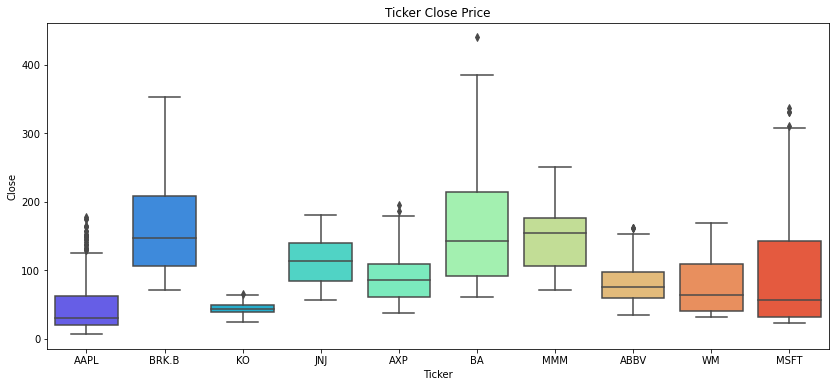

In [365]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Ticker', y='Close',data=df,palette='rainbow')
plt.title('Ticker Close Price');

In [282]:
# Convert the 'Date' column from Excel serial date format to datetime format
for i in range(len(df['Date'])):
    xl_date = df.loc[i, 'Date']
    datetime_date = xlrd.xldate_as_datetime(xl_date, 0)
    df.loc[i, 'Date'] = datetime_date.date()

In [283]:
df = df.rename(columns={'AAPL':'Ticker'})

In [284]:
df['Ticker'].nunique()

10

In [285]:
group = df.groupby('Ticker')

In [286]:
group['Ticker'].unique()

Ticker
AAPL      [AAPL]
ABBV      [ABBV]
AXP        [AXP]
BA          [BA]
BRK.B    [BRK.B]
JNJ        [JNJ]
KO          [KO]
MMM        [MMM]
MSFT      [MSFT]
WM          [WM]
Name: Ticker, dtype: object

In [287]:
def plot(price):
    # Create a figure with 10 subplots (one for each ticker)
    fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
    axs = axs.flatten() # Flatten the 2D array of subplots into a 1D array


    # Loop through each ticker and plot its price data on a subplot

    for i, (ticker, group) in enumerate(df.groupby('Ticker')):
            ax = axs[i] # Select the appropriate subplot
            ax.plot(group['Date'], group[price], label=ticker) # Plot the ticker's price data
            ax.set_title(ticker) # Set the subplot title to the ticker symbol
            ax.legend() # Add a legend to the subplot

        # Add a main title to the figure
    fig.suptitle('Stock Prices by Ticker - ' + price , fontsize=20)

        # Adjust spacing between subplots and save the figure
    plt.tight_layout()
    plt.show()

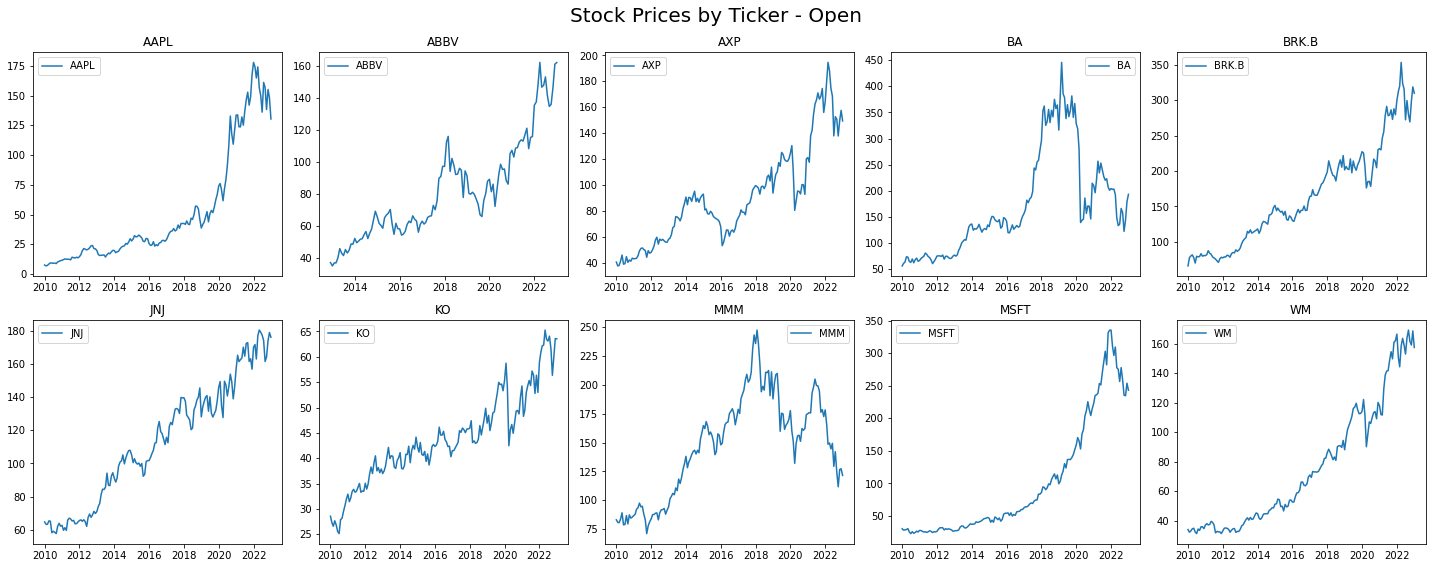

In [288]:
plot('Open')

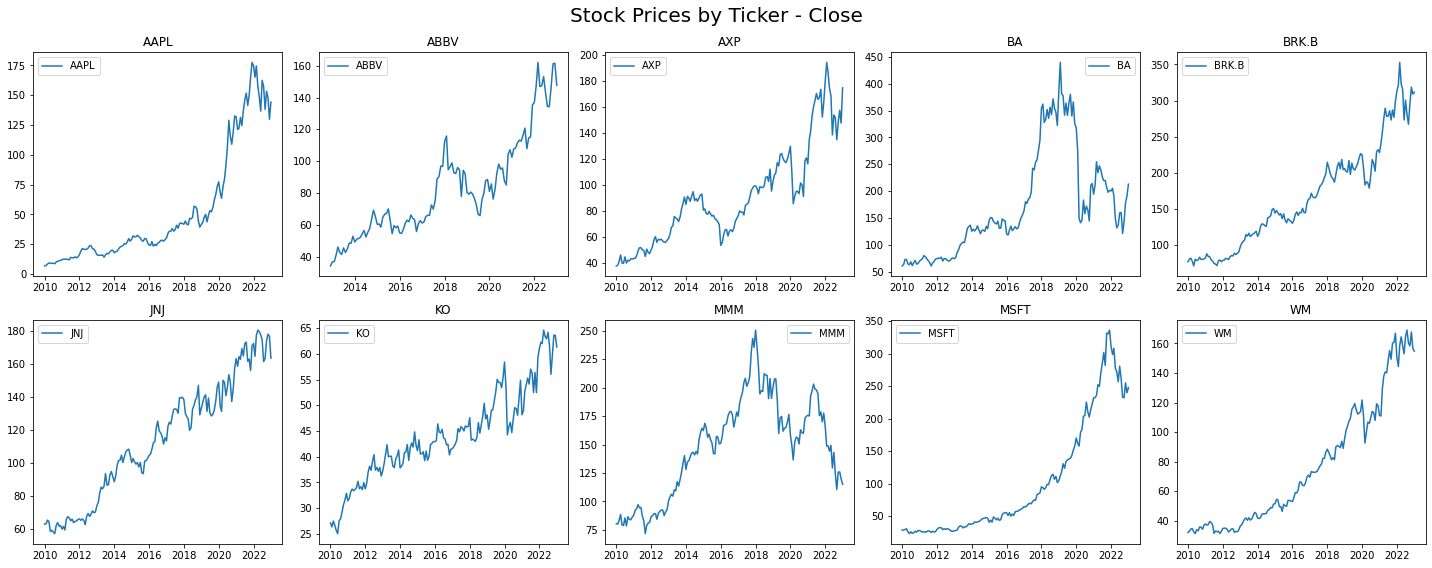

In [289]:
plot('Close')

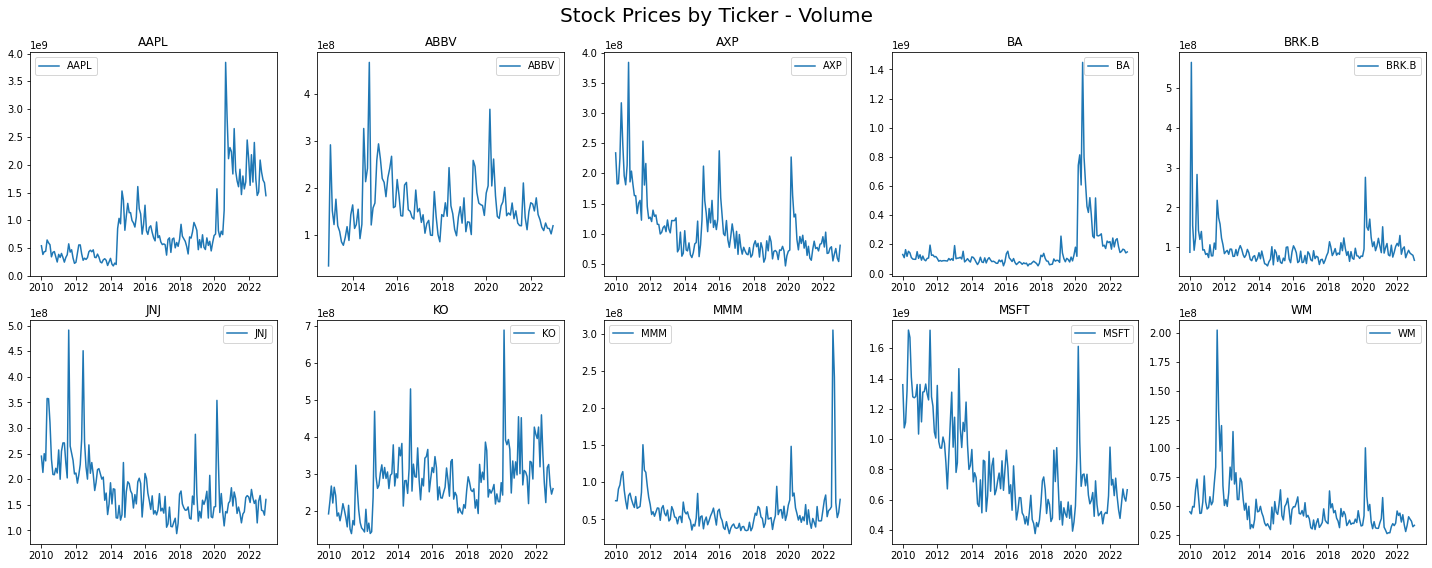

In [290]:
plot('Volume')

## Create dfs for all Tickers

In [339]:
# convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# create new column with month count per ticker
df['Month_Count'] = df.groupby('Ticker')['Date'].transform(lambda x: (x.dt.year - x.dt.year.min()) * 12 + x.dt.month - x.dt.month.min() + 1)

In [328]:
ticker_dfs = {}
for ticker in df['Ticker'].unique():
    ticker_df = df.loc[df['Ticker'] == ticker]
    # Perform operations on the ticker_df as needed
    # For example, you can create a linear regression model for each ticker_df
    
    # Store the ticker_df in a dictionary using the ticker symbol as the key
    ticker_dfs[ticker] = ticker_df

In [329]:
AAPL = ticker_dfs['AAPL']
BRKB = ticker_dfs['BRK.B']
KO = ticker_dfs['KO']
JNJ = ticker_dfs['JNJ']
AXP = ticker_dfs['AXP']
BA = ticker_dfs['BA']
MMM = ticker_dfs['MMM']
ABBV = ticker_dfs['ABBV']
WM = ticker_dfs['WM']
MSFT = ticker_dfs['MSFT']

In [338]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 156
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         157 non-null    datetime64[ns]
 1   Open         157 non-null    float64       
 2   Close        157 non-null    float64       
 3   Volume       157 non-null    int64         
 4   Ticker       157 non-null    object        
 5   Month_Count  157 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 8.6+ KB


## Define ML models

In [1]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.svm import SVR

In [389]:
def preds(df, price):
    X_train, X_test, y_train, y_test = train_test_split(df[['Month_Count']], df[price], test_size=0.2, shuffle=False)
    
    # Train a linear regression model on the training data
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Calculate the mean squared error and r2 socre of the predictions
    mse = mean_squared_error(y_test, y_pred)
    r2s = r2_score(y_test,y_pred)
    coef = model.coef_
    intercept = model.intercept_

    # Plot outputs
    sns.lmplot(y='Month_Count', x = price, data=df)
    plt.title(df['Ticker'].unique())
    print(df['Ticker'].unique())
    plt.savefig('stockprediction.png')

    print("MSE: ", mse)
    print("r2s :",r2s)
    print("Coef :", coef)
    print("Intercept :", intercept)

### Predict Closing Price

In [358]:
tickers = [AAPL, BRKB, KO, JNJ, AXP, BA, MMM, ABBV, WM, MSFT]

['AAPL']
MSE:  6399.0672244657135
r2s : -13.98395624855779
Coef : [0.42049872]
Intercept : 3.0826398322580744
['BRK.B']
MSE:  2189.110113008348
r2s : -0.25461880016991767
Coef : [1.28464743]
Intercept : 57.1251316129033
['KO']
MSE:  24.012733904343584
r2s : 0.28458923048247364
Coef : [0.16921689]
Intercept : 30.26302646451613
['JNJ']
MSE:  69.59278101979552
r2s : 0.4706234739117955
Coef : [0.76673782]
Intercept : 52.540877419354864
['AXP']
MSE:  1315.0246470513678
r2s : -0.6316881941211985
Coef : [0.56557487]
Intercept : 40.785503225806465
['BA']
MSE:  32503.4143771814
r2s : -25.784409070862672
Coef : [2.50930267]
Intercept : 8.976131612903288
['MMM']
MSE:  6272.70293382305
r2s : -8.14570363589635
Coef : [1.11515754]
Intercept : 74.00771483870963
['ABBV']
MSE:  990.4901468193258
r2s : -1.713013369180433
Coef : [0.56118465]
Intercept : 36.41222017673046
['WM']
MSE:  1081.4057814194612
r2s : -1.4682018565233452
Coef : [0.68534685]
Intercept : 16.551228387096792
['MSFT']
MSE:  15465.02094

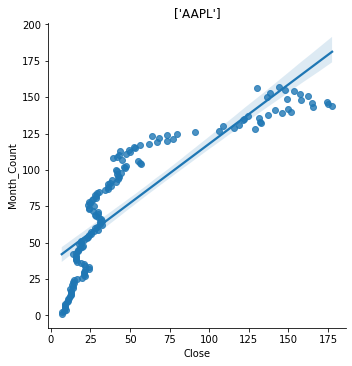

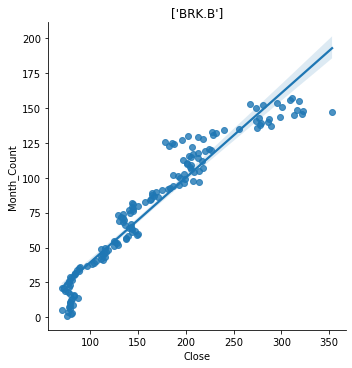

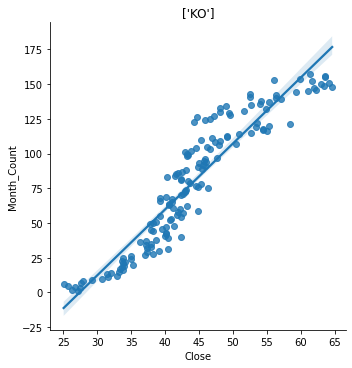

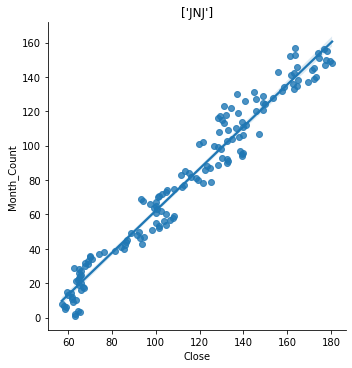

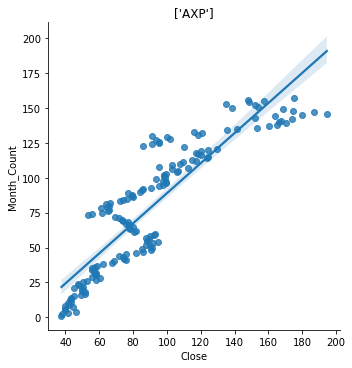

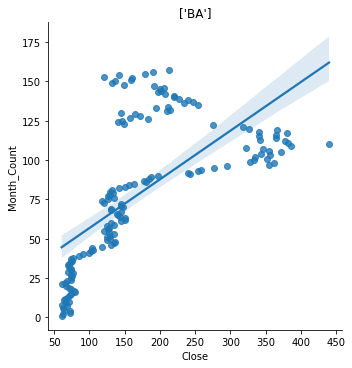

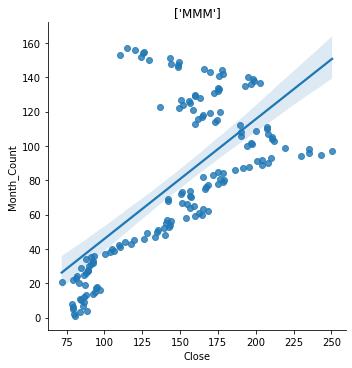

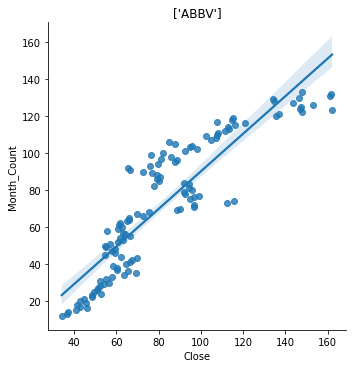

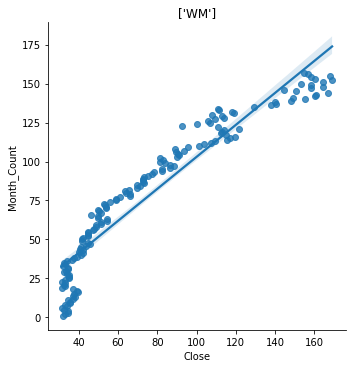

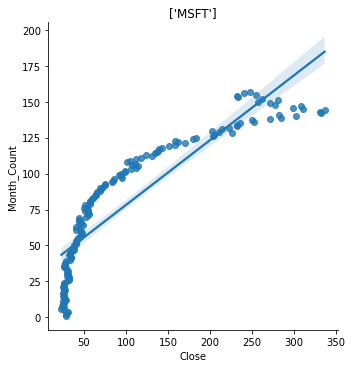

In [390]:
for i in tickers:
    preds(i, 'Close')

In [402]:
def forest(df,price):
    X_train, X_test, y_train, y_test = train_test_split(df[['Month_Count']], df[price], test_size=0.2, shuffle=False)
    
    # Train a linear regression model on the training data
    rf = RandomForestRegressor(n_jobs=1)
    
    param_grid = {'n_estimators': np.arange(100, 1001, 100),
                  'max_features': ['auto', 'sqrt', 'log2'],
                  'max_depth': np.arange(10, 110, 10),
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4]}

    # Set up the RandomizedSearchCV object with 5-fold cross-validation
    rs = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1, random_state=42)

    rf.fit(X_train,y_train)
    # Fit the RandomizedSearchCV object to the training data
    rs.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = rs.predict(X_test)

    # Calculate the mean squared error and r2 score of the predictions
    mse = mean_squared_error(y_test, y_pred)
    r2s = r2_score(y_test, y_pred)

    # Print the results
    print(df['Ticker'].unique())
    print("MSE: ", mse)
    print("r2s: ", r2s)
    print("Best parameters: ", rs.best_params_)
    print("Best score: ", rs.best_score_)

In [403]:
for i in tickers:
    forest(i, 'Close')

['AAPL']
MSE:  4532.059796096263
r2s:  -9.612200703396127
Best parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50}
Best score:  -3.6512729140635036
['BRK.B']
MSE:  8484.571507321583
r2s:  -3.8626621663371212
Best parameters:  {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
Best score:  -0.8278542341975793
['KO']
MSE:  84.16147971757101
r2s:  -1.507420821316392
Best parameters:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}
Best score:  -1.532643353174739
['JNJ']
MSE:  397.50357002249757
r2s:  -2.0237196433680817
Best parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}
Best score:  -2.3112873782418326
['AXP']
MSE:  3567.4248163125067
r2s:  -3.4264759365873116
Best parameters:  {'n_estimators': 100, 'min_samples_split': 2, 

In [400]:
def SVRreg(df,price):
   X_train, X_test, y_train, y_test = train_test_split(df[['Month_Count']], df[price], test_size=0.2, shuffle=False)
    
    # Train a linear regression model on the training data
   svr = SVR()
    
   param_grid = {'kernel': ['linear', 'rbf', 'sigmoid'], 
              'C': [0.01, 0.1, 1, 10, 100], 
              'epsilon': [0.01, 0.1, 1, 10]}
   
   # Create a GridSearchCV object and fit it to the data
   grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
   grid_search.fit(X_train, y_train)

   # Use the best parameters to train a new model
   best_model = SVR(**grid_search.best_params_)
   best_model.fit(X_train, y_train) 

   # Make predictions on the testing data using the best model
   y_pred = best_model.predict(X_test)

   # Get the best hyperparameters and the best score
   best_params = grid_search.best_params_
   best_score = -grid_search.best_score_

   # Calculate the mean squared error and r2 score of the predictions
   mse = mean_squared_error(y_test, y_pred)
   r2s = r2_score(y_test, y_pred)

   # Print the results
   print(df['Ticker'].unique())
   print("MSE: ", mse)
   print("r2s: ", r2s)
   print("Best parameters: ", best_params)
   print("Best score: ", best_score)

In [404]:
for i in tickers:
    SVRreg(i, 'Close')

['AAPL']
MSE:  7132.518966729673
r2s:  -15.701395436333982
Best parameters:  {'C': 0.01, 'epsilon': 1, 'kernel': 'linear'}
Best score:  76.97794493070067
['BRK.B']
MSE:  16921.95535676909
r2s:  -8.698280228152957
Best parameters:  {'C': 100, 'epsilon': 0.1, 'kernel': 'rbf'}
Best score:  152.53321091069898
['KO']
MSE:  27.113859802261686
r2s:  0.19219746560313156
Best parameters:  {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}
Best score:  11.016063415198724
['JNJ']
MSE:  65.00827796630824
r2s:  0.5054967504892256
Best parameters:  {'C': 0.01, 'epsilon': 0.1, 'kernel': 'linear'}
Best score:  61.45351955595296
['AXP']
MSE:  6074.20832626867
r2s:  -6.536903613805894
Best parameters:  {'C': 100, 'epsilon': 10, 'kernel': 'rbf'}
Best score:  171.7709418323674
['BA']
MSE:  3719.846306619711
r2s:  -2.065335967509514
Best parameters:  {'C': 100, 'epsilon': 10, 'kernel': 'rbf'}
Best score:  2246.7867072699746
['MMM']
MSE:  1304.4852154135654
r2s:  -0.9019608139340956
Best parameters:  {'C': 10, 